# SE-2200E Notebook 6: A Better Prediction

Ningsong Shen

March 14, 2021

Conclusion: if we can use simple machine learning techniques on sparse data to predict, there is definitely opportunity for more complicated technologies to move in

In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv('../clean_data/sample_data.csv').drop_duplicates()
df = df[df["real_departure_time"] > 0]
df = df[df["scheduled_departure_time"] > 0]
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df.head()

,trip_id,start_date,route_id,stop_sequence,vehicle_id,scheduled_departure_time,real_departure_time
0,1346803,20201104,24,41,3140.0,2134.0,2169.0
1,1346803,20201105,24,41,3177.0,2134.0,2040.0
2,1346803,20201106,24,41,3143.0,2134.0,2040.0
3,1346803,20201109,24,41,3144.0,2134.0,2040.0
4,1346803,20201110,24,41,3178.0,2134.0,2040.0


In [14]:
df = df.sample(10000)

X = df[["trip_id", "start_date", "route_id", "stop_sequence", "vehicle_id", "scheduled_departure_time"]]
X['trip_id'] = X['trip_id'].astype('category')
X['route_id'] = X['route_id'].astype('category')
X['vehicle_id'] = X['vehicle_id'].astype('category')
y = df["real_departure_time"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

<ipython-input-14-ac5f8df8ceea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['trip_id'] = X['trip_id'].astype('category')
<ipython-input-14-ac5f8df8ceea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['route_id'] = X['route_id'].astype('category')
<ipython-input-14-ac5f8df8ceea>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [21]:
regressor = MLPRegressor(random_state=1, max_iter=50)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

C:\Users\nings\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


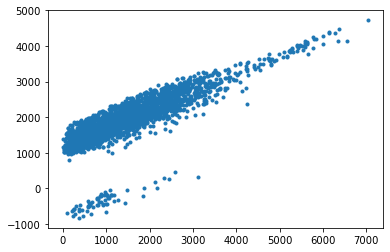

In [22]:
plt.scatter(y_test, y_pred, marker=".")